In [341]:
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import ConnectionPatch
from matplotlib import animation
import ipywidgets as widgets
from scipy import optimize as opt
from urllib.request import urlopen
from PIL import Image
from io import BytesIO
import scipy.stats as stats
from matplotlib.animation import FuncAnimation
from scipy import special
from scipy.optimize import minimize

%matplotlib inline

# Settings for the figures
plt.style.use(plt.style.available[20])
plt.style.use("https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/plots_style.txt")

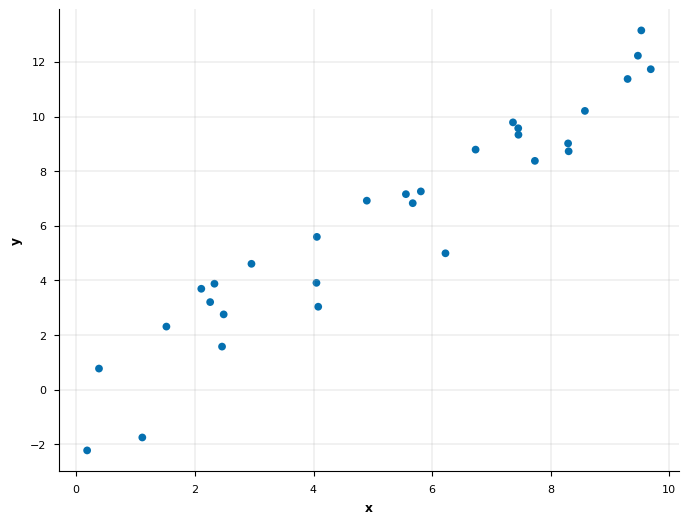

In [3]:
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

In [4]:
def mse(x, y, theta_hat):
    """Compute the mean squared error
    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter
    Returns:
    float: The mean squared error of the data with the estimated parameter.
    """

    # Compute the estimated y
    y_hat = theta_hat * x

    # Compute mean squared error
    mse = np.mean((y - y_hat)**2)

    return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
    print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

theta_hat of 0.75 has an MSE of 9.08
theta_hat of 1.0 has an MSE of 3.01
theta_hat of 1.5 has an MSE of 4.52


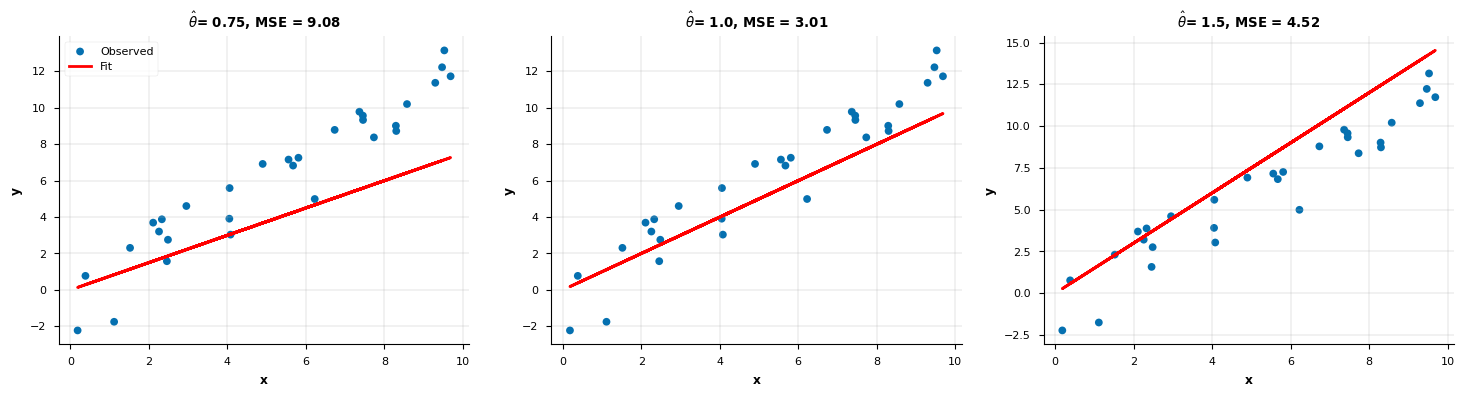

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

    # True data
    ax.scatter(x, y, label='Observed')  # our data scatter plot

    # Compute and plot predictions
    y_hat = theta_hat * x
    ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

    ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
    );

axes[0].legend()

[-2.   -1.85 -1.7  -1.55 -1.4  -1.25 -1.1  -0.95 -0.8  -0.65 -0.5  -0.35
 -0.2  -0.05  0.1   0.25  0.4   0.55  0.7   0.85  1.    1.15  1.3   1.45
  1.6   1.75  1.9   2.05  2.2   2.35  2.5   2.65  2.8   2.95  3.1   3.25
  3.4   3.55  3.7   3.85  4.  ]


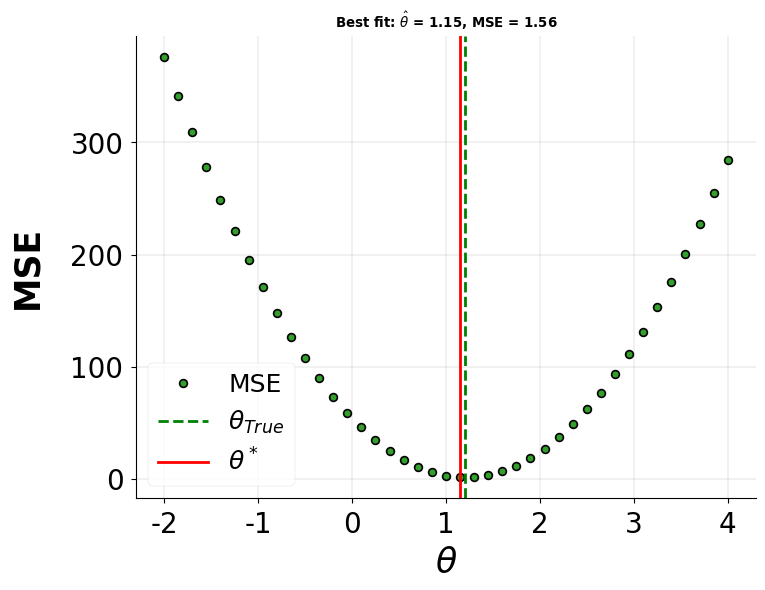

In [67]:
# Loop over different thetas, compute MSE for each
theta_hat_grid = np.linspace(-2.0, 4.0,41)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
    errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]

print (theta_hat_grid)

# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1',linewidth=0, markeredgecolor='k', markeredgewidth=1.2)
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\theta^*$")
ax.set(
  title=fr"Best fit: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend(fontsize=18);
x_ticks = [-2,-1,0,1,2,3,4]
y_ticks = [0,100,200,300]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks,fontsize=20)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks,fontsize=20)

ax.set_xlabel(r'$\theta$', fontsize=25, fontweight='bold')
ax.set_ylabel('MSE', fontsize=25, fontweight='bold', labelpad=19)
plt.savefig('theta_agains_MSE.pdf', dpi=300, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

[-2.   -1.85 -1.7  -1.55 -1.4  -1.25 -1.1  -0.95 -0.8  -0.65 -0.5  -0.35
 -0.2  -0.05  0.1   0.25  0.4   0.55  0.7   0.85  1.    1.15  1.3   1.45
  1.6   1.75  1.9   2.05  2.2   2.35  2.5   2.65  2.8   2.95  3.1   3.25
  3.4   3.55  3.7   3.85  4.  ]


MovieWriter imagemagick unavailable; using Pillow instead.


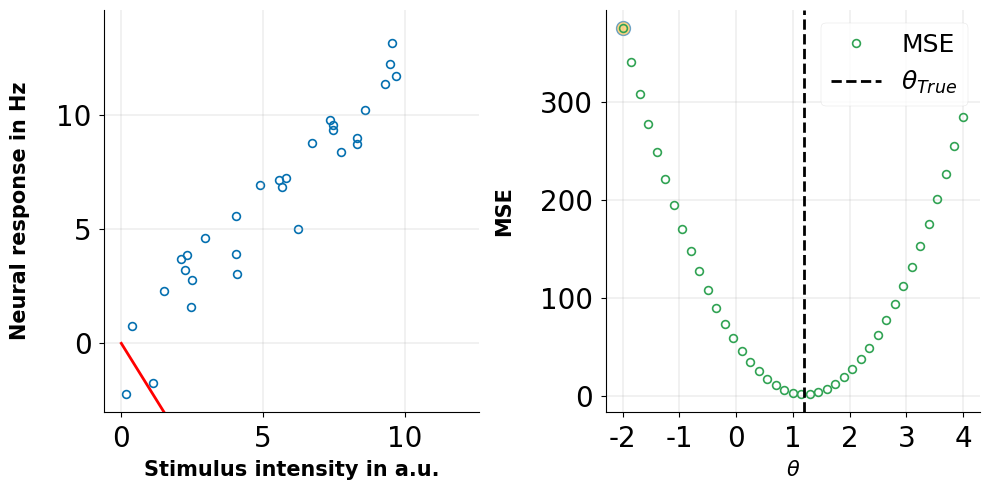

In [123]:
theta_hat_grid = np.linspace(-2.0, 4.0,41)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
    errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]

print (theta_hat_grid)

# Plot results

fig, (ax_0, ax) = plt.subplots(1,2, figsize = (10,5))
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1',linewidth=0, markeredgecolor='#31a354',
            markerfacecolor=(0,0,0,0),markeredgewidth=1.2)

theta_scatter = ax.scatter(theta_hat_grid[0],errors[0],zorder=-10,facecolor='#fec44f',edgecolor='#3182bd',linewidth=1, alpha=0.7, s=100)
ax.axvline(theta, color='k', ls='--', label=r"$\theta_{True}$")
# ax.axvline(theta_hat, color='r', ls='-', label=r"$\theta^*$")
ax.set(
#   title=fr"Best fit: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend(fontsize=18);
x_ticks = [-2,-1,0,1,2,3,4]
y_ticks = [0,100,200,300]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks,fontsize=20)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks,fontsize=20)

ax.set_xlabel(r'$\theta$', fontsize=15, fontweight='bold')
ax.set_ylabel('MSE', fontsize=15, fontweight='bold', labelpad=19)

# True data
ax_0.scatter(x, y, label='Observed', edgecolor='#0570B0', facecolor=(0,0,0,0), linewidth=1.2)  # our data scatter plot

# Compute and plot predictions
X = np.array([0,12])
y_hat = theta_hat * X
line_fit, = ax_0.plot(X, y_hat, color='r', label='Fit')  # our estimated model
x_ticks = [0,5,10]
y_ticks = [0,5,10]
ax_0.set_xticks(x_ticks)
ax_0.set_xticklabels(x_ticks,fontsize=20)
ax_0.set_yticks(y_ticks)
ax_0.set_yticklabels(y_ticks,fontsize=20)

ax_0.set_xlabel('Stimulus intensity in a.u.', fontsize=15, fontweight='bold')
ax_0.set_ylabel('Neural response in Hz', fontsize=15, fontweight='bold', labelpad=19)


plt.tight_layout()

def update(t):

    tt = (1-2*(t//41)) * (t%41) + ((t//41)*40)
     
    theta = theta_hat_grid[tt]
    err = errors[tt]
    theta_scatter.set_offsets(np.array([theta,err]))
    
    X = np.array([0,12])
    y_hat = theta * X
    line_fit.set_ydata(y_hat)
    
    

frames = [t for t in range(82)]


# Create and render the animation
anim = animation.FuncAnimation(fig, func = update,  frames = frames )
# save it to file
anim.save(f"iterate_through_theta.gif",
          fps = 4, writer='imagemagick',dpi=300)


In [31]:
def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
    """ Plot observed vs predicted data

    Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
    """
    fig, ax = plt.subplots()
    ax.scatter(x, y, label='Observed')  # our data scatter plot
    ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
    # plot residuals
    ymin = np.minimum(y, y_hat)
    ymax = np.maximum(y, y_hat)
#     ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
    ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
    )
    ax.legend()

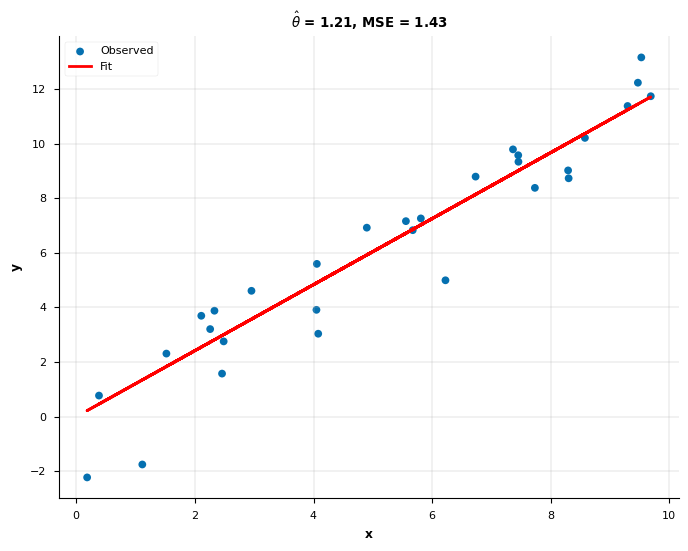

In [32]:
def solve_normal_eqn(x, y):
    """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.
    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    Returns:
    float: the value for theta_hat arrived from minimizing MSE
    """

    # Compute theta_hat analytically
    theta_hat = (x.T @ y) / (x.T @ x)

    return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x

plot_observed_vs_predicted(x, y, y_hat, theta_hat)

plt.savefig('ISI_inputs.pdf', dpi=300, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

# Fit with MSLE 



In [10]:
np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples) # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples) # sample from a standard normal distribution
y = theta * x + noise

In [14]:
def likelihood(theta_hat, x, y):
    """The likelihood function for a linear model with noise sampled from a
        Gaussian distribution with zero mean and unit variance.
        Args:
        theta_hat (float): An estimate of the slope parameter.
        x (ndarray): An array of shape (samples,) that contains the input values.
        y (ndarray): An array of shape (samples,) that contains the corresponding
          measurement values to the inputs.
        Returns:
        float: the likelihood value for the theta_hat estimate
    """
    sigma = 1

    # Compute Gaussian likelihood
    pdf = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(y - theta_hat * x)**2 / (2 * sigma**2))

    return pdf


print(likelihood(1.0, x[1], y[1]))

0.11344443599846923


In [221]:
def plot_density_image(x, y, theta, sigma=1, ax=None):
    """ Plots probability distribution of y given x, theta, and sigma

        Args:

        x (ndarray): An array of shape (samples,) that contains the input values.
        y (ndarray): An array of shape (samples,) that contains the corresponding
          measurement values to the inputs.
        theta (float): Slope parameter
        sigma (float): standard deviation of Gaussian noise

    """

  # plot the probability density of p(y|x,theta)
    if ax is None:
        fig, ax = plt.subplots()

    xmin, xmax = np.floor(np.min(x)), np.ceil(np.max(x))
    ymin, ymax = np.floor(np.min(y)), np.ceil(np.max(y))
    xx = np.linspace(xmin, xmax, 200)
    yy = np.linspace(ymin, ymax, 200)

    surface = np.zeros((len(yy), len(xx)))
    for i, x_i in enumerate(xx):
        surface[:, i] = stats.norm(theta * x_i, sigma).pdf(yy)

    ax.set(xlabel='x', ylabel='y')

    return ax.imshow(surface, origin='lower', aspect='auto', 
            cmap=plt.get_cmap('RdPu'),
            extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=np.max(surface)*1.2)

C:\Users\sebas\AppData\Local\Temp\ipykernel_13732\44379363.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im, ax=ax1)


Text(0, 0.5, 'Neural response in Hz')

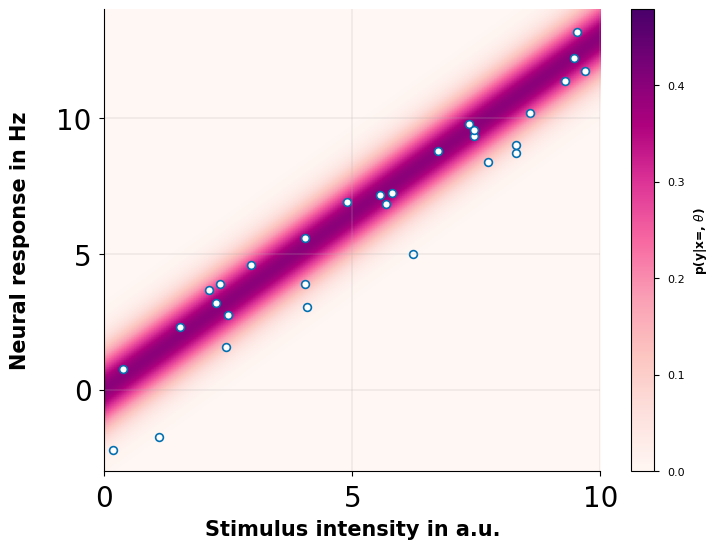

In [235]:
fig, ax1 = plt.subplots()

# Invokes helper function to generate density image plots from data and parameters
im = plot_density_image(x, y, 1.3, ax=ax1)
cbar = plt.colorbar(im, ax=ax1)
cbar.ax.set_ylabel(r'p(y|x=, $\theta$)')
# ax1.axvline(8, color='k')
ax1.scatter(x, y, label='Observed', edgecolor='#0570B0', facecolor='w', linewidth=1.2)
x_ticks = [0,5,10]
y_ticks = [0,5,10]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks,fontsize=20)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks,fontsize=20)
ax1.set_xlabel('Stimulus intensity in a.u.', fontsize=15, fontweight='bold')
ax1.set_ylabel('Neural response in Hz', fontsize=15, fontweight='bold', labelpad=19)


-34.538776394910684


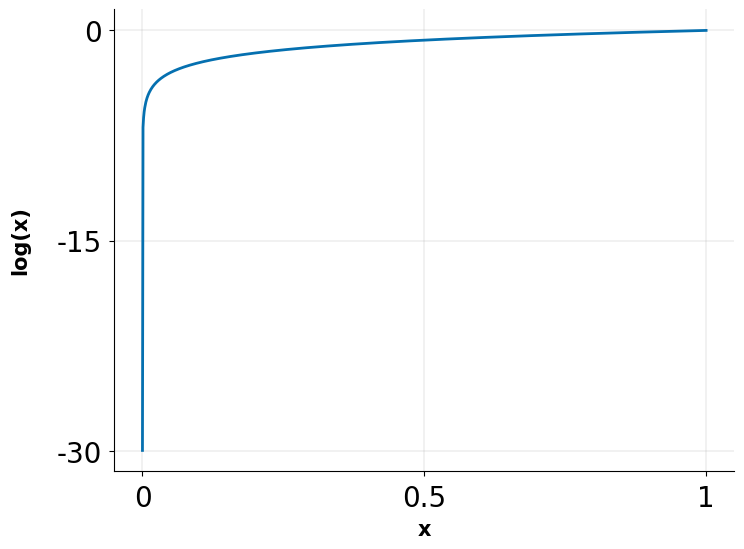

In [255]:
fig, ax1 = plt.subplots()
X = np.linspace(0.0000000000001,1,1000)
Y = np.log(X)
ax1.plot(X,Y)
x_ticks = [0,0.5,1]
y_ticks = [0,-15,-30]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks,fontsize=20)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks,fontsize=20)
ax1.set_xlabel('x', fontsize=15, fontweight='bold')
ax1.set_ylabel('log(x)', fontsize=15, fontweight='bold', labelpad=19)

print (np.log(1E-15))

C:\Users\sebas\AppData\Local\Temp\ipykernel_13732\1217573426.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im, ax=ax1)


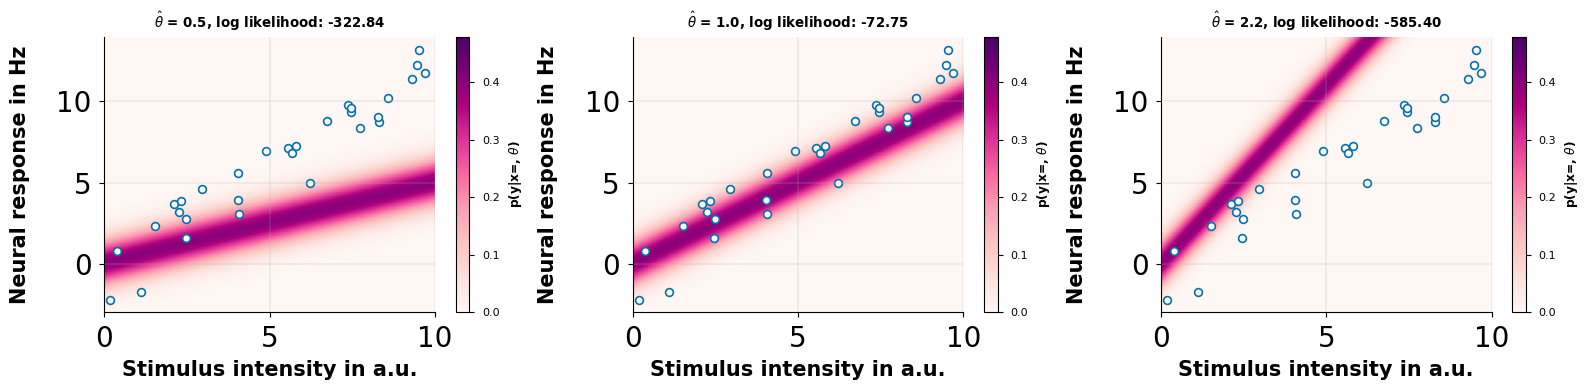

In [259]:
theta_hats = [0.5, 1.0, 2.2]
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
for theta_hat, ax1 in zip(theta_hats, axes):
    im = plot_density_image(x, y, theta_hat, ax=ax1)
    cbar = plt.colorbar(im, ax=ax1)
    cbar.ax.set_ylabel(r'p(y|x=, $\theta$)')
    # ax1.axvline(8, color='k')
    ax1.scatter(x, y, label='Observed', edgecolor='#0570B0', facecolor='w', linewidth=1.2)
    x_ticks = [0,5,10]
    y_ticks = [0,5,10]
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(x_ticks,fontsize=20)
    ax1.set_yticks(y_ticks)
    ax1.set_yticklabels(y_ticks,fontsize=20)
    ax1.set_xlabel('Stimulus intensity in a.u.', fontsize=15, fontweight='bold')
    ax1.set_ylabel('Neural response in Hz', fontsize=15, fontweight='bold', labelpad=19)
    ll = np.sum(np.log(likelihood(theta_hat, x, y)))
    ax1.set(title=fr'$\hat{{\theta}}$ = {theta_hat}, log likelihood: {ll:.2f}')
    
    plt.tight_layout()

C:\Users\sebas\AppData\Local\Temp\ipykernel_13732\251590260.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, ax=ax,);


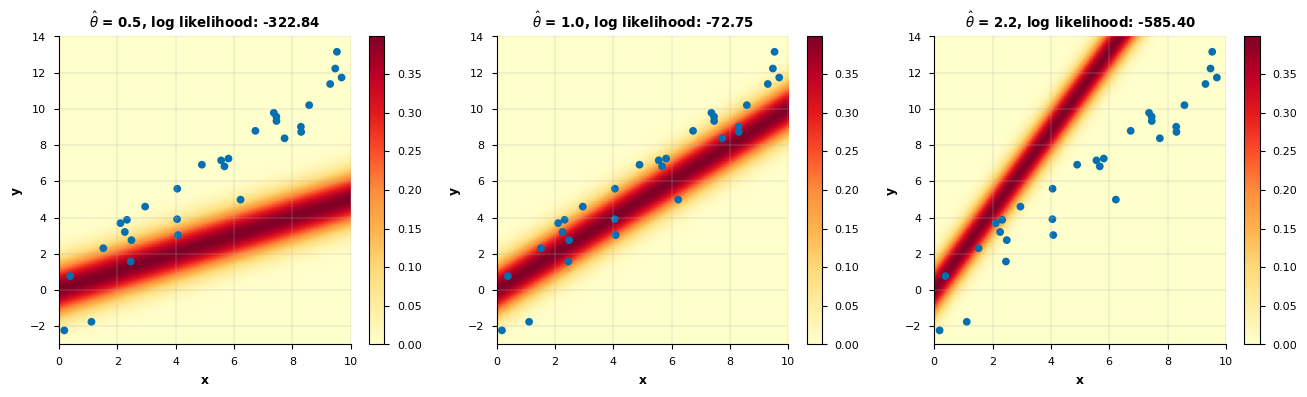

In [178]:
theta_hats = [0.5, 1.0, 2.2]
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
for theta_hat, ax in zip(theta_hats, axes):
    ll = np.sum(np.log(likelihood(theta_hat, x, y)))  # log likelihood
    im = plot_density_image(x, y, theta_hat, ax=ax)
    ax.scatter(x, y)
    ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat}, log likelihood: {ll:.2f}')
    plt.colorbar(im, ax=ax,);





In [128]:
def p(x,sigma, mean):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(1/(2*sigma**2))*(x-mean)**2)

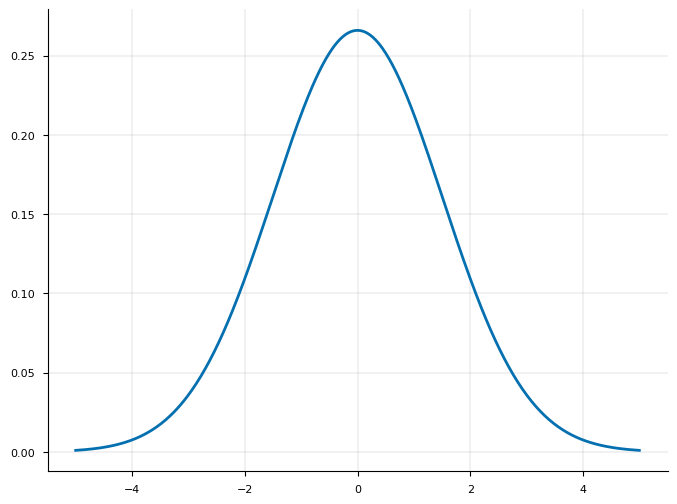

In [132]:
fig, ax = plt.subplots()
X = np.linspace(-5,5,501)
sigma = 1.5
mean = 0
ax.plot(X,p(X,sigma, mean))
plt.savefig('gaussian.pdf', dpi=300, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

MovieWriter imagemagick unavailable; using Pillow instead.


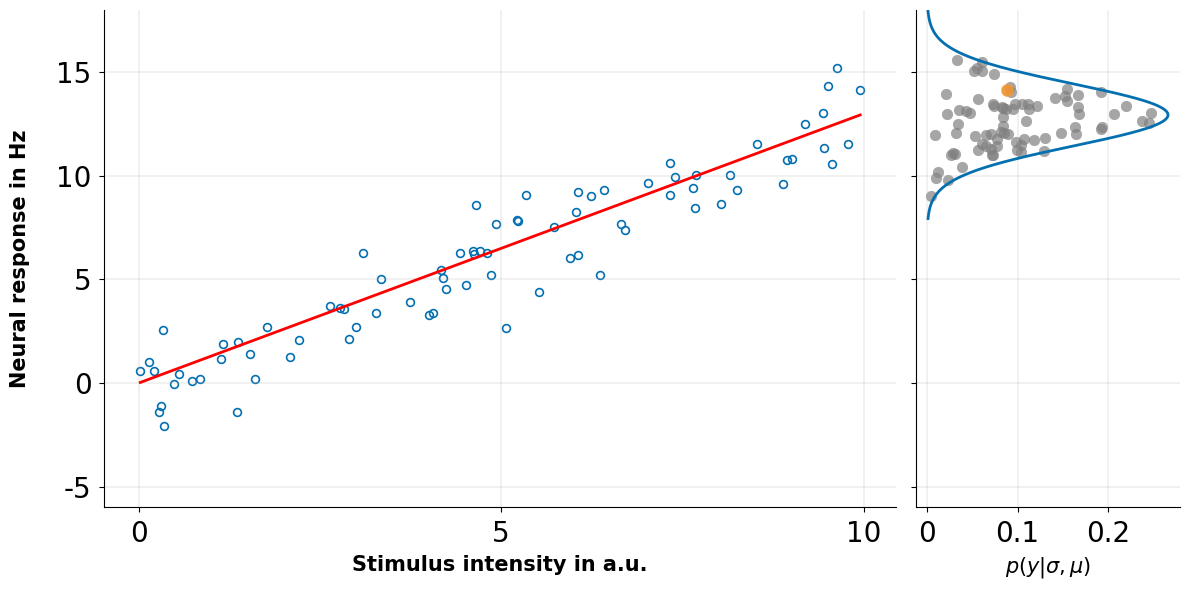

In [173]:
fig, (ax_0, ax) = plt.subplots(1,2, figsize=(12,6),sharey=True, gridspec_kw={'width_ratios': [3, 1]})
np.random.seed(12)
X = np.sort(np.random.rand(80)*10)
theta = 1.3
Y = theta * X

line_fit, = ax_0.plot(X, Y, color='r', label='Model')

scatter_data = ax_0.scatter(X, Y, label='Observed', edgecolor='#0570B0', facecolor=(0,0,0,0), linewidth=1.2)  # our data scatter plot

# Compute and plot predictions


  # our estimated model
x_ticks = [0,5,10]
y_ticks = [-5,0,5,10,15]
ax_0.set_xticks(x_ticks)
ax_0.set_xticklabels(x_ticks,fontsize=20)
ax_0.set_yticks(y_ticks)
ax_0.set_yticklabels(y_ticks,fontsize=20)

ax_0.set_xlabel('Stimulus intensity in a.u.', fontsize=15, fontweight='bold')
ax_0.set_ylabel('Neural response in Hz', fontsize=15, fontweight='bold', labelpad=19)
ax_0.set_ylim([-6,18])





XX = np.linspace(-5+mean,5+mean,501)
sigma = 1.5
mean = 0
gaussian_plot, = ax.plot(p(XX,sigma, mean),XX)

noise_scatter = ax.scatter([],[],color='grey',s=60,alpha = 0.7)
noise_scatter_highlight = ax.scatter([],[],color='#fe9929',s=80,alpha=0.8)
x_ticks = [0,0.1,0.2]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks,fontsize=20)
ax.set_xlabel(r'$p(y|\sigma,\mu)$', fontsize=15)
plt.tight_layout()


def update(t):

    if t >= len(X):
        return 
    
    x = X[t]
    y = np.random.normal(loc=x*theta, scale=sigma)
    
    
    
    offsets = scatter_data.get_offsets()
    offsets[t,:] = np.array([x,y])
    scatter_data.set_offsets(offsets)

    
    
    mean = x*theta
    XX = np.linspace(-5+mean,5+mean,501)
    gaussian_plot.set_xdata(p(XX,sigma, mean))
    gaussian_plot.set_ydata(XX)
    
    random_x = np.random.random()*p(y,sigma,mean)
    
    
    if t > 0:
        offsets = noise_scatter.get_offsets()
        offsets[:,1] += (X[t] - X[t-1])*theta # shift the offsets to fit the gaussian
        offsets = np.vstack([offsets,[random_x,y]])

    else:
        offsets = [random_x,y]
        
    noise_scatter.set_offsets(offsets)
    
    noise_scatter_highlight.set_offsets([random_x,y])
    
#     p(theta*x,sigma=sigma, mean)
     
#     theta = theta_hat_grid[tt]
#     err = errors[tt]
#     theta_scatter.set_offsets(np.array([theta,err]))
    
#     X = np.array([0,12])
#     y_hat = theta * X
#     line_fit.set_ydata(y_hat)
    
    

frames = [t for t in range(len(X) + 40)]


# Create and render the animation
anim = animation.FuncAnimation(fig, func = update,  frames = frames )
# save it to file
anim.save(f"generate_noisy_data.gif",
          fps = 4, writer='imagemagick',dpi=300)


### Generate a model

2D makes spikes


In [404]:
def makeGaussian(size, x0, y0, sig_x,sig_y):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)      
    y = x[:,np.newaxis]

    return np.exp(-4*np.log(2) * (((x-x0)/sig_x)**2 + ((y-y0)/ sig_y)**2))


0.892393847513135


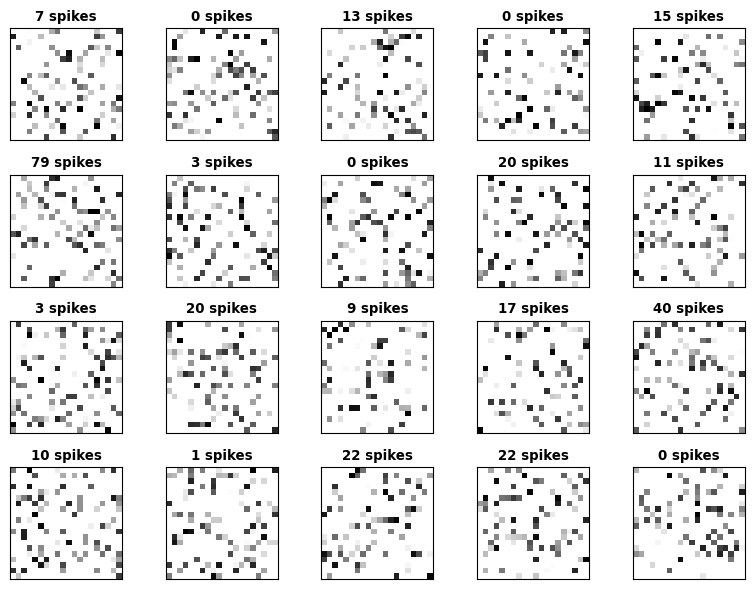

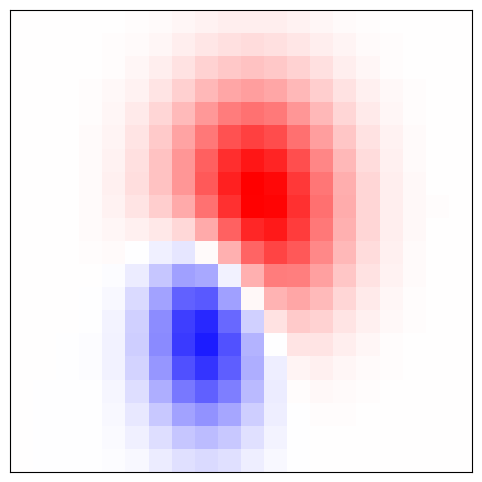

In [509]:

def create_random_image(size=20):
    
    random_dots = np.random.rand(size,size)*1
    random_dots[np.random.rand(size,size)<0.8] = 0
    
    return random_dots





def get_filter(ax = None, size=20):
    
    pos = makeGaussian(size=size, x0=10, y0=8, sig_x = 6,sig_y = 8)
    neg = makeGaussian(size=size, x0=8, y0=13, sig_x = 4,sig_y = 7)
    filter_matrix = pos-neg
    
    if ax != None:
        ax.imshow(filter_matrix, cmap='bwr')
        
    return filter_matrix
        
        
        
        
def get_spikes(input_pattern):

    dim_red = np.sum(input_pattern * get_filter())
    
    def poisson(y,lam):
        return (lam)**y/special.factorial(y) * np.exp(-lam)
    

    y = np.linspace(0,80,81).astype(int)
    prob = np.cumsum(poisson(lam=np.exp(dim_red),y = y))
    
    threshold = np.random.rand()
    n_spikes = np.argmax(prob>threshold)
    
    return n_spikes
           
    
def show_visual_space(pattern, ax = None, style='filter',alpha=1):
    
    if ax == None:
        fig, ax = plt.subplots()
    
    if style == 'filter':
        max_ = np.max(np.abs(pattern))
        print (max_)
        ax.imshow(pattern,cmap='bwr', alpha=alpha, vmin = -max_, vmax=max_)
    else:
        ax.imshow(pattern,cmap='binary', alpha=alpha)
    ax.grid(False)
    
    ax.spines[['right', 'top']].set_visible(True)

    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    ax.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    right=False,         # ticks along the righ edge are off
    labelleft=False) # labels along the left edge are off


np.random.seed(14)
fig, axes = plt.subplots(4,5) 
axes_flat = axes.flatten()
for ii in range(20):
    
    image = create_random_image()
    spikes = get_spikes(image)
    
    show_visual_space(image, style='random',ax=axes_flat[ii])
    axes_flat[ii].set_title(f'{spikes} spikes')

fig.tight_layout()
    
fig, ax = plt.subplots()
# img = create_random_image()
# show_visual_space(img, style='random',ax=ax)
# filt = get_filter(size=20)

show_visual_space(filt, style='filter',ax=ax)

# get_spikes(img)

In [503]:
def neg_log_lik_lnp(theta, X, y):
    """Return -loglike for the Poisson GLM model.
    Args:
        theta (1D array): Parameter vector.
        X (2D array): Full design matrix.
        y (1D array): Data values.
    Returns:
        number: Negative log likelihood.
    """
    # Compute the Poisson log likelihood
    rate = np.exp(X @ theta)
    log_lik = y.T @ np.log(rate) - rate.sum()
    return -log_lik


def fit_lnp(stim, spikes):
    """Obtain MLE parameters for the Poisson GLM.
    Args:
        stim (1D array): Stimulus values at each timepoint
        spikes (1D array): Spike counts measured at each timepoint
        d (number): Number of time lags to use.
    Returns:
        1D array: MLE parameters
    """

    # Build the design matrix
    y = spikes
    constant = np.ones_like(y)
    
    print (constant.shape, stim.shape)
    X = np.hstack([constant, stim])

    # Use a random vector of weights to start (mean 0, sd .2)
    x0 = np.random.normal(0, .2, X.shape[1])

    # Find parameters that minmize the negative log likelihood function
    res = minimize(neg_log_lik_lnp, x0, args=(X, y))

    return res["x"]


# Fit LNP model

np.random.seed(100)

image = create_random_image()
stim = np.array(image.flatten())
spikes = get_spikes(image)
all_spikes = np.array(spikes)
for ii in range(10_000):

    image = create_random_image()
    spikes = get_spikes(image)
    
    stim = np.vstack([stim,image.flatten()])
    all_spikes = np.vstack([all_spikes,spikes])


print (stim.shape, all_spikes.shape)

theta_lnp = fit_lnp(stim, all_spikes)

print (theta_lnp.shape)





# plot_spike_filter(theta_lg[1:], dt_stim, color=".5", label="LG")
# plot_spike_filter(theta_lnp[1:], dt_stim, label="LNP")
# plt.legend(loc="upper left");

(10001, 400) (10001, 1)
(10001, 1) (10001, 400)
(401,)


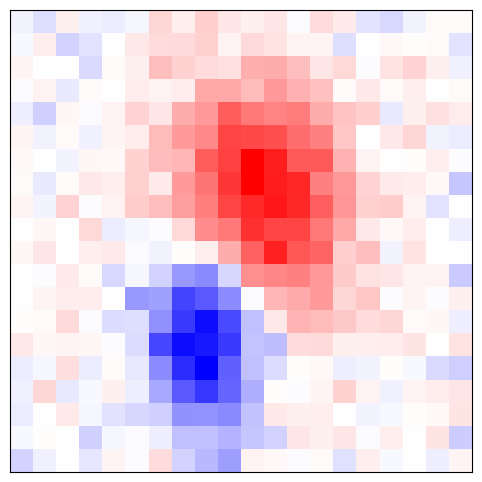

In [504]:
show_visual_space(theta_lnp[0]+theta_lnp[1:].reshape((20,20)), style='filter')

In [37]:
def plot_observed_vs_predicted_lecture(x, y, y_hat, theta_hat, show_residuals=False):
    """ Plot observed vs predicted data

    Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
    """
    fig, ax = plt.subplots()
    ax.scatter(x, y, label='Observed')  # our data scatter plot
    ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
    # plot residuals
    ymin = np.minimum(y, y_hat)
    ymax = np.maximum(y, y_hat)
    if show_residuals:
        ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
    ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
    )
    ax.legend()

In [38]:
def solve_normal_eqn(x, y):
    """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.
    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    Returns:
    float: the value for theta_hat arrived from minimizing MSE
    """

    # Compute theta_hat analytically
    theta_hat = (x.T @ y) / (x.T @ x)

    return theta_hat

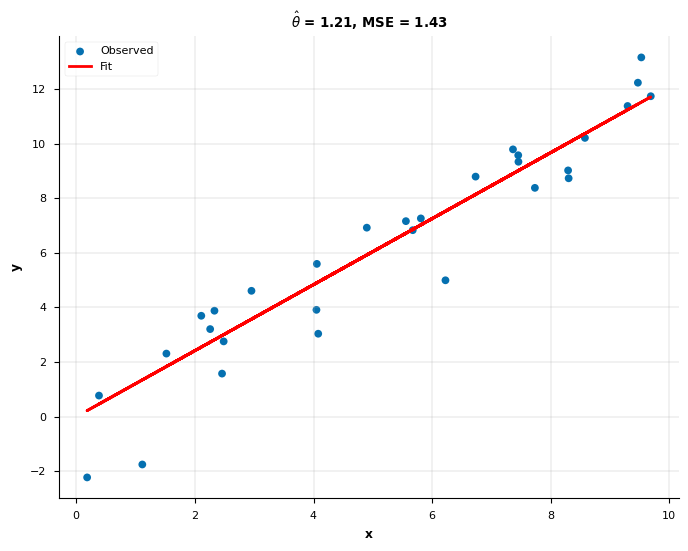

In [40]:


np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise
theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x

plot_observed_vs_predicted(x, y, y_hat, theta_hat)

plt.savefig('linear_fit.pdf', dpi=300, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )